### Get all time related vectors from BehaviorSync and create some basic comparisons

In [ ]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()


In [2]:
import u19_pipeline.ephys_pipeline as ep
import u19_pipeline.recording as recording
import matplotlib.pyplot as plt
import datajoint as dj
 


[2026-02-12 10:08:22,893][INFO]: DataJoint 0.14.4 connected to alvaros@datajoint00.pni.princeton.edu:3306


#### Select recording_id to fetch from

In [ ]:
recording_key = dict()
recording_key['recording_id'] = 611

#### Get behaviorSync and behavior records:

In [ ]:

sync_record = (ep.BehaviorSync & recording_key).fetch1('sync_data')

behavior = dj.create_virtual_module('behavior','u19_behavior')
behavior_session = (recording.Recording.BehaviorSession & recording_key).fetch(as_dict=True)[0]
behavior_session.pop('recording_id')
behavior_time = (behavior.SpatialTimeBlobs & behavior_session).fetch(as_dict=True)

behavior_session

{'subject_fullname': 'jk8386_jknpx6',
 'session_date': datetime.date(2026, 2, 3),
 'session_number': 0}

#### Fetch all time & idx related vectors (check ephys_pipeline function for all descriptions)

In [33]:
all_vectors = ep.get_full_vectors_from_key(recording_key)

[2026-02-12 18:51:18,725][WARNING]: Reconnecting to MySQL server.


get_ephys_root_data_dir ['/mnt/cup/braininit/Data/Raw/electrophysiology', '/mnt/cup/braininit/Data/Processed/electrophysiology']
get_session_directory(recording_key) jk8386/jk8386_jknpx6/20260203_g0/jknpx6_20260203_g0
ephys dir: /mnt/cup/braininit/Data/Raw/electrophysiology/jk8386/jk8386_jknpx6/20260203_g0/jknpx6_20260203_g0


In [34]:
all_vectors.keys()

dict_keys(['trial_index_nidq_virmen', 'iteration_index_nidq_virmen', 'trial_index_nidq', 'iteration_index_nidq', 'time_vector', 'time_as_behavior_trial_ind', 'time_as_behavior_fullsession', 'time_as_behavior_trial_ind_virmen', 'time_as_behavior_fullsession_virmen'])

#### Concatenate arrays of arrays vectors to get single vector time variables

In [ ]:
import numpy as np
time_as_behavior_fullsession = np.concatenate(([x for x in all_vectors['time_as_behavior_fullsession']]), axis=0) 
time_as_behavior_trial_ind = np.concatenate(([x for x in all_vectors['time_as_behavior_trial_ind']]), axis=0) 

time_as_behavior_fullsession_v = np.concatenate(([x for x in all_vectors['time_as_behavior_fullsession_virmen']]), axis=0) 
time_as_behavior_trial_ind_v = np.concatenate(([x for x in all_vectors['time_as_behavior_trial_ind_virmen']]), axis=0) 



#### Compare behvaior file time variables vs BehaviorSync ones 

In [35]:
diff_time_trial_ind = behavior_time[0]['trial_time'].squeeze() - time_as_behavior_trial_ind
diff_time_trial_ind_v = behavior_time[0]['trial_time'].squeeze() - time_as_behavior_trial_ind_v

diff_time_trial_full_session = (behavior_time[0]['cumulative_session_time'].squeeze() - behavior_time[0]['cumulative_session_time'][0]) - time_as_behavior_fullsession
diff_time_trial_full_session_v = (behavior_time[0]['cumulative_session_time'].squeeze() - behavior_time[0]['cumulative_session_time'][0]) - time_as_behavior_fullsession_v


#### "pulse only sync" Each trial individual time [0, ...] x ntrials 
#### Compare  iteration "start time" --- nidaq pulse signal vs behavior file

Text(0.5, 1.0, 'iteration "start time" comparison -- behavior file - nidaq pulse signal. Each trial ind. time')

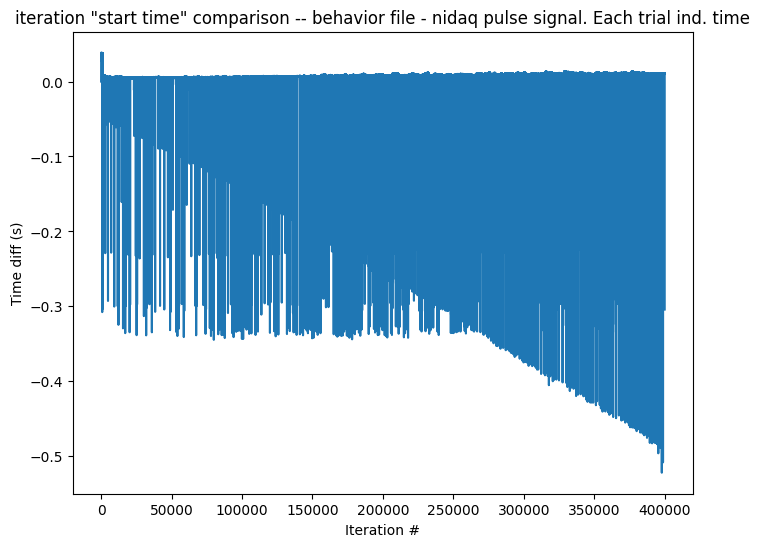

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(diff_time_trial_ind)

plt.xlabel('Iteration #')
plt.ylabel('Time diff (s)')
plt.title('iteration "start time" comparison -- behavior file - nidaq pulse signal. Each trial ind. time')

#### "pulse only sync" Each trial individual time [0, ...] x ntrials 
#### Historgram nidaq signal for behavior iteration "start time".

Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')

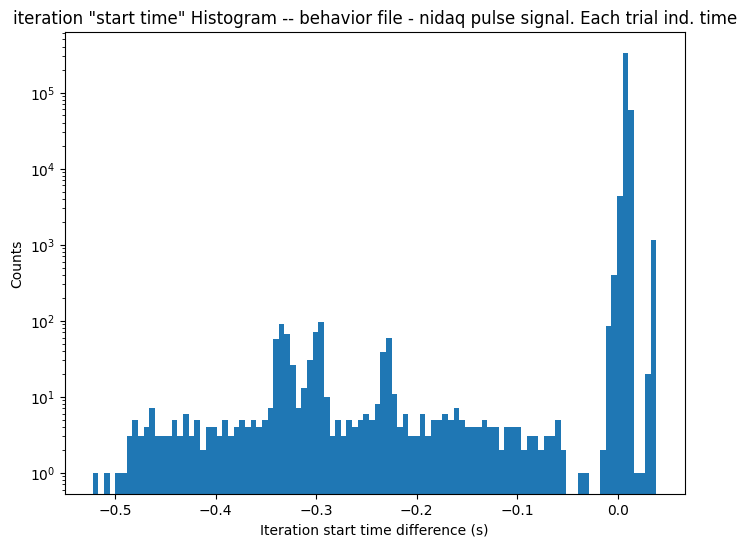

In [51]:
plt.figure(figsize=(8, 6))

plt.hist(diff_time_trial_ind,bins=100)

plt.yscale('log')
plt.xlabel('Iteration start time difference (s)')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Each trial ind. time')



#### Sanity check "virmen assisted sync" Each trial individual time [0, ...] x ntrials 
#### Compare  iteration "start time" --- nidaq pulse signal vs behavior file

In [52]:
print(diff_time_trial_ind_v.max())
print(diff_time_trial_ind_v.min())

0.00020019740895804716
-3.8263911505964643e-07


#### "pulse only sync" single vector time for all session [0, ...] x 1
#### Compare nidaq signal for behavior iteration "start time".

Text(0.5, 1.0, 'iteration "start time" comparison -- behavior file - nidaq pulse signal. Single vector time all session')

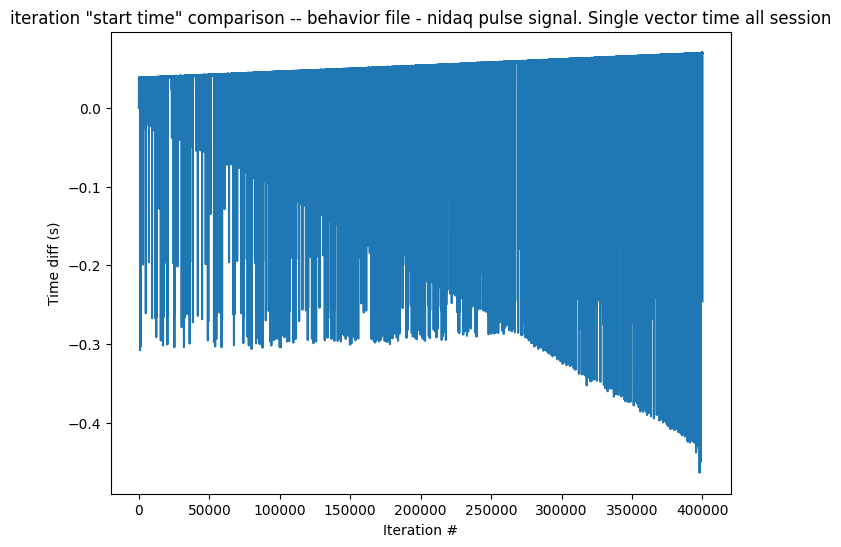

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(diff_time_trial_full_session)

plt.xlabel('Iteration #')
plt.ylabel('Time diff (s)')
plt.title('iteration "start time" comparison -- behavior file - nidaq pulse signal. Single vector time all session')

Text(0.5, 1.0, 'iteration "start time" Histogram -- behavior file - nidaq pulse signal. Single vector time all session')

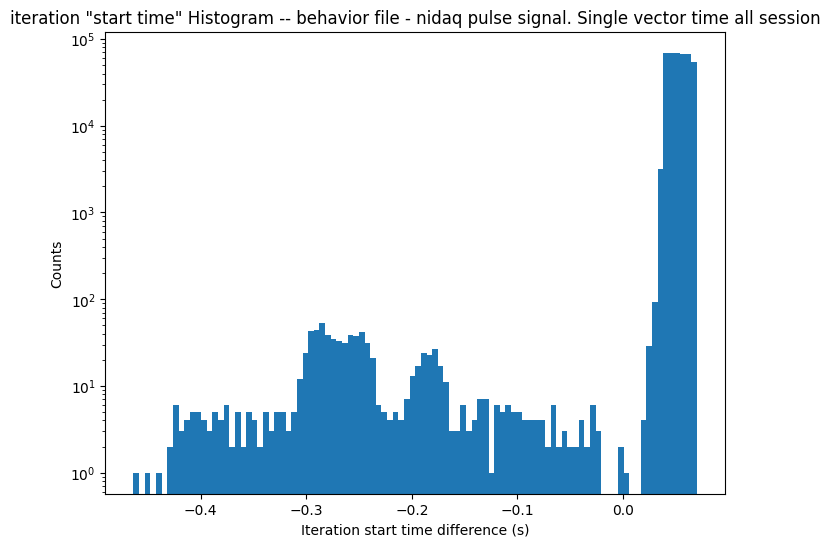

In [55]:
plt.figure(figsize=(8, 6))

plt.hist(diff_time_trial_full_session,bins=100)

plt.yscale('log')
plt.xlabel('Iteration start time difference (s)')
plt.ylabel('Counts')
plt.title('iteration "start time" Histogram -- behavior file - nidaq pulse signal. Single vector time all session')



#### Sanity check "virmen assisted sync" Single vector time all session
#### Compare  iteration "start time" --- nidaq pulse signal vs behavior file

Text(0.5, 1.0, 'iteration "start time" sanity check comparison -- behavior file - nidaq pulse signal. Single vector time all session')

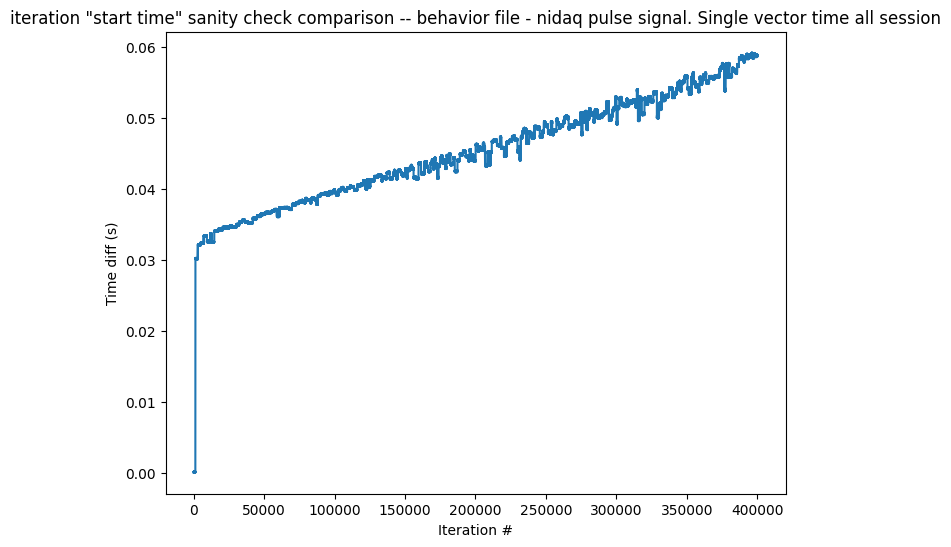

In [56]:


plt.figure(figsize=(8, 6))
plt.plot(diff_time_trial_full_session_v)

plt.xlabel('Iteration #')
plt.ylabel('Time diff (s)')
plt.title('iteration "start time" sanity check comparison -- behavior file - nidaq pulse signal. Single vector time all session')



#### "pulse only sync" vs "virmen assisted sync" comparison

In [57]:
diff_times_fullsessions = time_as_behavior_fullsession_v - time_as_behavior_fullsession
diff_times_trial_inds = time_as_behavior_trial_ind_v - time_as_behavior_trial_ind

#### "pulse only sync" vs "virmen assisted sync" comparison
#### single vector time for all session [0, ...] x 1

Text(0.5, 1.0, 'iteration "start time" comparison -- "pulse only sync" vs "virmen assisted sync" single vector time for all session [0, ...] x 1')

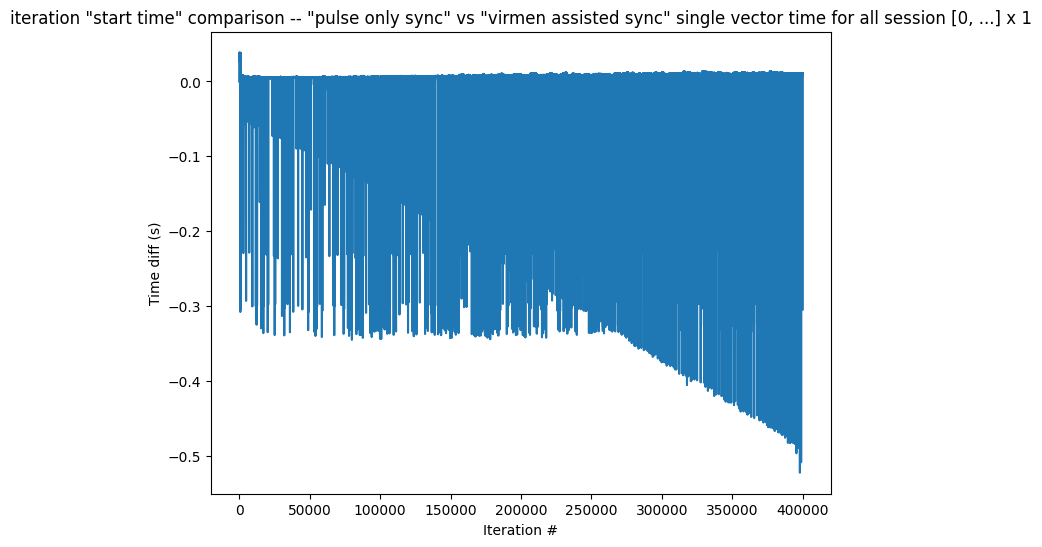

In [61]:


plt.figure(figsize=(8, 6))
plt.plot(diff_times_fullsessions)

plt.xlabel('Iteration #')
plt.ylabel('Time diff (s)')
plt.title('iteration "start time" comparison -- "pulse only sync" vs "virmen assisted sync" single vector time for all session [0, ...] x 1')



Text(0.5, 1.0, 'iteration "start time" histogram  -- "pulse only sync" vs "virmen assisted sync" single vector time for all session [0, ...] x 1')

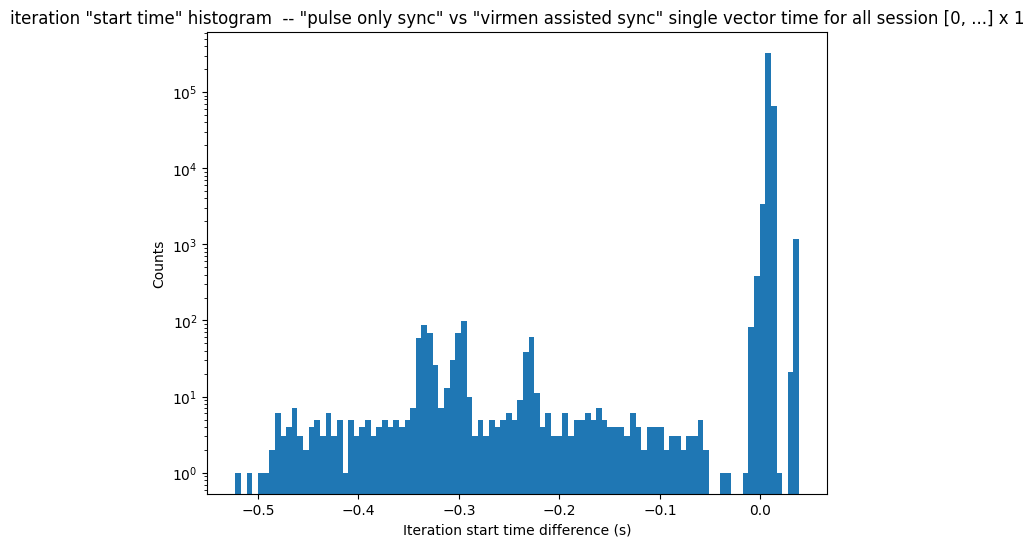

In [62]:
plt.figure(figsize=(8, 6))

plt.hist(diff_times_fullsessions,bins=100)

plt.yscale('log')
plt.xlabel('Iteration start time difference (s)')
plt.ylabel('Counts')
plt.title('iteration "start time" histogram  -- "pulse only sync" vs "virmen assisted sync" single vector time for all session [0, ...] x 1')


#### No difference in diff between trial individual and full session "pulse only sync" vs "virmen assisted sync"

In [65]:
(diff_times_fullsessions - diff_times_trial_inds).max()

np.float64(3.552713678800501e-15)